# Prueba Rappi

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

import datetime
import os

os.chdir(r"E:/Prueba Rappi/Prueba-Rappi/documentos")
rcParams['figure.figsize'] = 18.7,6.27

In [17]:
dataset = pd.read_csv("Orders.csv")

# Convertir las fechas a datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])


## 1. Análisis preliminar de los datos

En esta sección nos centraremos en analizar los datos de manera que nos permita dar una mejor visión y contexto de los registros trabajados. 

### Identificación de valores faltantes o valores nulos

In [18]:
dataset.isnull().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

In [19]:
dataset.isna().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

En este conjunto de datos, no se identifican valores faltantes o nulos.

### Estadística descriptiva básica

In [20]:
dataset.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,1.255490e+05,1.255490e+05,125549.000000,125549.000000,125549.000000,125549.000000
mean,1.507838e+07,7.485716e+08,1.476668,27.369828,5374.313360,0.922827
std,4.752629e+05,3.298381e+08,0.846750,84.818191,1784.919817,0.266867
min,1.421073e+07,3.000000e+07,0.000000,-260.333130,0.000000,0.000000
25%,1.467255e+07,9.000043e+08,0.809372,-18.417603,4200.000000,1.000000
50%,1.509367e+07,9.000077e+08,1.360573,11.781250,5200.000000,1.000000
75%,1.547552e+07,9.000127e+08,2.003069,62.978638,6400.000000,1.000000
max,1.590252e+07,9.000173e+08,9.360177,975.226074,108200.000000,1.000000


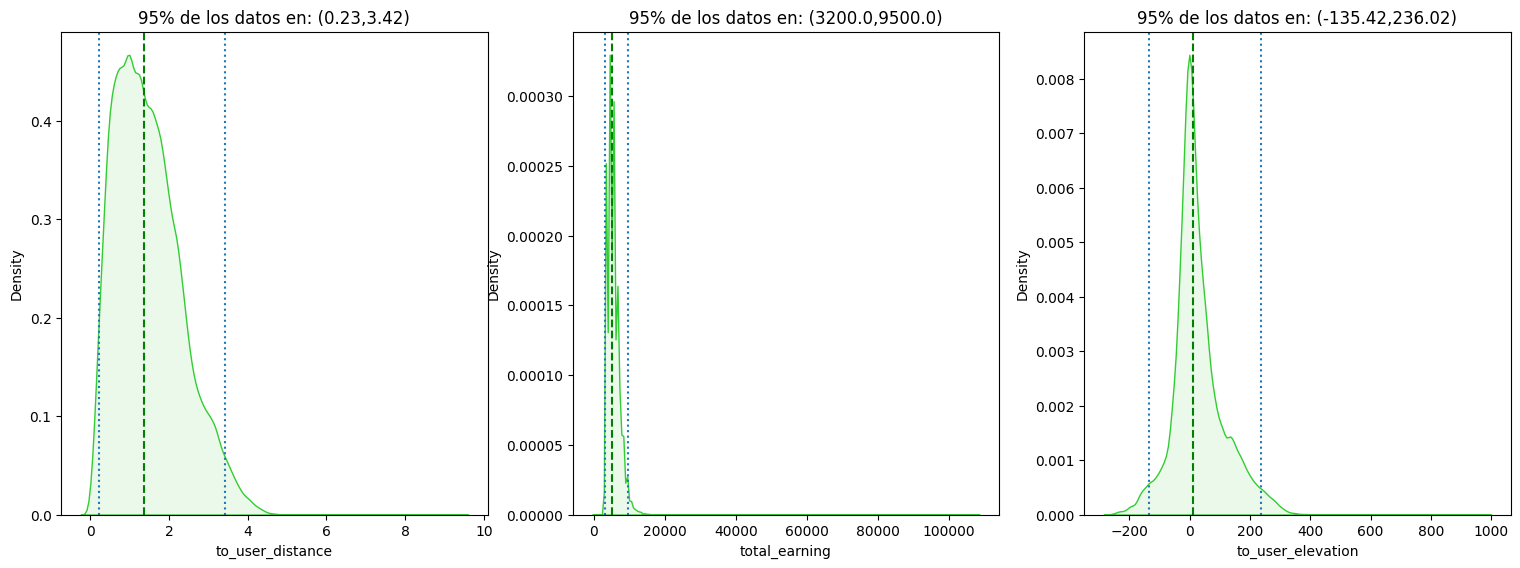

In [70]:

fig, axs = plt.subplots(ncols=3)
for i in [2,3,4]:
    quantiles = np.quantile(dataset[dataset.columns[i]], q=(0.025, 0.975, 0.5))
    ax = sns.kdeplot(x = dataset[dataset.columns[i]], fill = True, color = "limegreen", alpha = 0.1, ax=axs[2-i])
    ax.axvline(x = quantiles[0], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[1], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[2], ymin = 0, ymax = 1, color = 'green', linestyle = '--')
    ax.set(title = '95% de los datos en: ({0},{1})'.format(round(quantiles[0], 2), round(quantiles[1],2)))
    

La distancia de la tienda al usuario está entre 0 y 9.36 kilómetros, destacando que el 95% de los usuarios se encuentra entre 0.23 y 3.42 kilómetros, por lo que rara vez los pedidos están más allá de los 4 km y el promedio de la distancia es de 1.47 km. En cuanto a las ganancias, el 95% de las ganancias por pedido de los couriers está entre los 3200 y los 9500 pesos, dónde rara vez la ganancia está por encima de los 10000 pesos por pedido con un promedio de 5374 pesos de ganancia. La elevación de los usuarios con respecto a la tienda varía entre -135.42 metros y 236.02 metros, con un promedio de 27 metros de diferencia; este item presenta la mayor cantidad de observaciones por encima y por debajo del promedio y el 95% de los datos, además que es el único donde el valor de la desviación estándar es mayor al valor promedio de los datos.

In [87]:
non_taken_df = dataset.loc[dataset['taken']==0,:]
non_taken_df.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken,day,hour
count,9.689000e+03,9.689000e+03,9689.000000,9689.000000,9689.000000,9689.0,9689.000000,9689.000000
mean,1.507970e+07,7.706063e+08,1.730976,23.672238,5084.823614,0.0,3.237692,16.136340
std,4.854365e+05,3.094613e+08,0.843599,89.789034,1896.889515,0.0,1.942495,4.280775
min,1.421081e+07,3.000000e+07,0.000000,-259.170288,200.000000,0.0,0.000000,0.000000
25%,1.465504e+07,9.000051e+08,1.094629,-25.133667,3600.000000,0.0,1.000000,13.000000
50%,1.508213e+07,9.000089e+08,1.689055,9.335571,4700.000000,0.0,4.000000,17.000000
75%,1.554548e+07,9.000131e+08,2.270345,63.798584,6000.000000,0.0,5.000000,19.000000
max,1.590252e+07,9.000173e+08,4.670187,475.685425,18700.000000,0.0,6.000000,23.000000


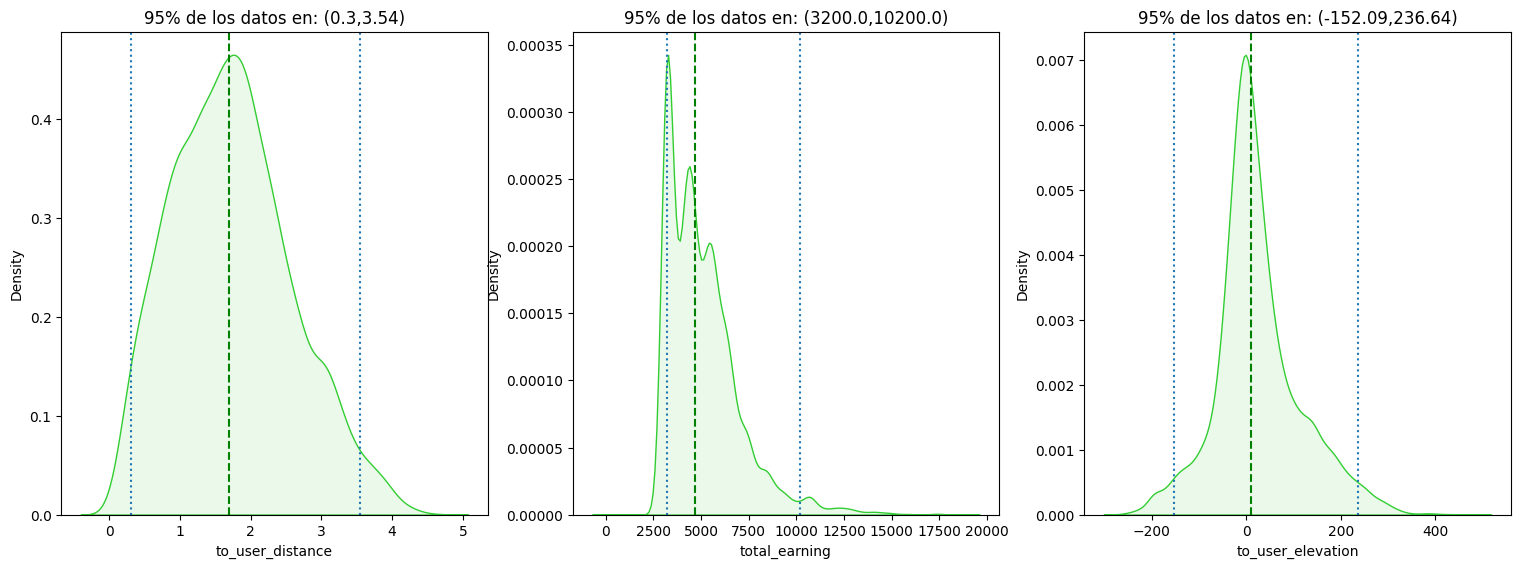

In [85]:


fig, axs = plt.subplots(ncols=3)
for i in [2,3,4]:
    quantiles = np.quantile(non_taken_df[non_taken_df.columns[i]], q=(0.025, 0.975, 0.5))
    ax = sns.kdeplot(x = non_taken_df[non_taken_df.columns[i]], fill = True, color = "limegreen", alpha = 0.1, ax=axs[2-i])
    ax.axvline(x = quantiles[0], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[1], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[2], ymin = 0, ymax = 1, color = 'green', linestyle = '--')
    ax.set(title = '95% de los datos en: ({0},{1})'.format(round(quantiles[0], 2), round(quantiles[1],2)))

Al analizar sólamente los casos donde no se toman las órdenes por los courier, no se ve una diferencia tan importante a nivel del 95% de los datos observados totales, salvo en el item de ganancia total donde el 97.5% de los registros están un poco por encima de los pedidos tomados; sin embargo, el promedio de ganancia está en los 5083 pesos, ligeramente por debajo de la totalidad de las observaciones. 

### Coeficiente de Variación.

Se usa para medir la variabilidad de un conjunto de datos dado. A pesar de que es una medida adimensional, es útil para relacionar la desviación estándar con el tamaño de la media. Se expresa como: 

$$C_v = \frac{\sigma}{\overline{x}}$$

In [22]:
# Coeficientes de variación para las variables numéricas
def coef_variacion(serie):
    return(round(np.std(serie) / np.mean(serie)*100, 2))

for i in [2,3,4]:
    print('Coeficiente de variación de {0}: {1}%'.format(dataset.columns[i], coef_variacion(dataset[dataset.columns[i]])))


Coeficiente de variación de to_user_distance: 57.34%
Coeficiente de variación de to_user_elevation: 309.9%
Coeficiente de variación de total_earning: 33.21%


En este caso, la elevación en metros entre la tienda y el usuario, es la variable con mayor variabilidad del conjunto de datos, por lo que será necesario reprocesar los datos antes de aplicar cualquier tipo de metodología estadística con el fin de identificar las causas de que una orden no sea aceptada.

## 2. Análisis por unidad temporal

In [96]:
def morning_time(x):
    if x >= 23 or 0<= x <= 2:
        result = 'Midnight'
    elif x >=20:
        result = 'Night'
    elif x >= 17: 
        result = 'Evening'
    elif x >= 12:
        result = 'Afternoon'
    elif x >= 7: 
        result = 'Morning'
    else:
        result = 'Early morning'
    return(result)


dataset['day'] = dataset['created_at'].dt.dayofweek
# Day of week toma cómo 0 el día lunes

dataset['hour'] = dataset['created_at'].dt.hour
dataset['daytime'] = dataset['hour'].apply(morning_time)


### Análisis por hora del día

<Axes: xlabel='hour', ylabel='order_id'>

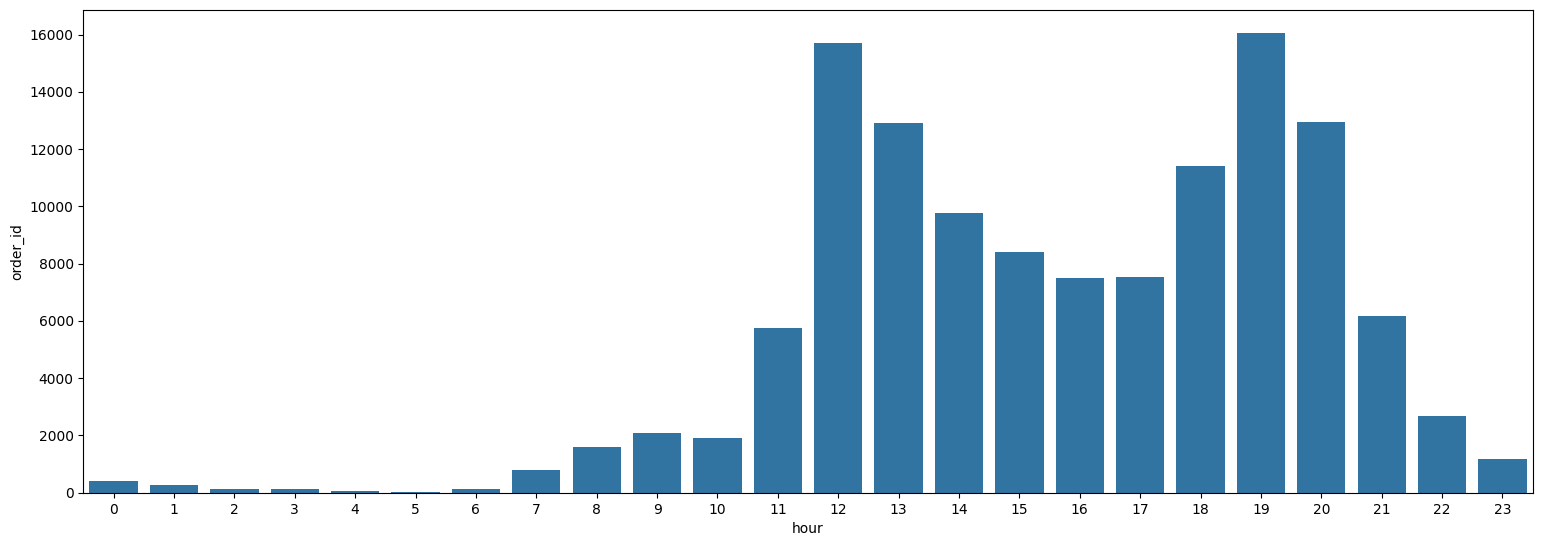

In [105]:
hour_analysis = dataset.groupby(['hour', 'daytime'])[['order_id']].count().reset_index()
sns.barplot(x = 'hour', y = 'order_id', data = hour_analysis)

No es de sorprender ver los picos de órdenes creadas en la hora de almuerzo y la hora de la cena con picos entre las 12 y las 13 horas, y picos entre las 18 y las 20 horas con un nivel relativamente constante entre las 14 y las 17 horas. Las órdenes caen al mínimo entre las 23 y las 7 horas. 

([<matplotlib.patches.Wedge at 0x29e82496fd0>,
 [Text(0.23200176943173825, 1.0752558667501158, 'Afternoon'),
  Text(-1.00590352040737, 0.44514953401307716, 'Early morning'),
  Text(-0.9818425800562577, -0.4959688982068042, 'Evening'),
  Text(-0.19384654315727573, -1.0827850745674206, 'Midnight'),
  Text(0.1938193897250067, -1.082789935382956, 'Morning'),
  Text(0.9408411526423861, -0.5699280002724436, 'Night')],
 [Text(0.12654641969003902, 0.5865032000455176, '43%'),
  Text(-0.5486746474949291, 0.2428088367344057, '0%'),
  Text(-0.5355504982125041, -0.27052848993098405, '28%'),
  Text(-0.10573447808578675, -0.5906100406731385, '2%'),
  Text(0.10571966712273091, -0.5906126920270669, '10%'),
  Text(0.5131860832594833, -0.31086981833042376, '17%')])

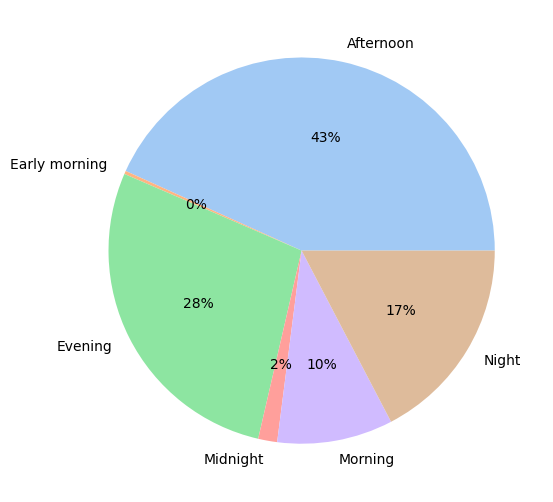

In [123]:
daytime_analysis = dataset.groupby(['daytime'])[['order_id']].count().reset_index()
plt.pie(daytime_analysis['order_id'], labels = daytime_analysis['daytime'], colors = sns.color_palette('pastel'), autopct='%.0f%%')

Las órdenes creadas se centran principalmente en las franjas horarias de "Afternoon" definida entre las 12 y las 17 horas, "Evening" definida entre las 17 y las 20 horas y "Night" entre las 20 y 23 horas. Esto denota un comportamiento de consumo centrado en las horas de la tarde / noche por lo que se tiene que tener en cuenta que sólo un 10% de las órdenes totales son hechas entre las 7 y las 11 horas.

<Axes: xlabel='hour', ylabel='order_id'>

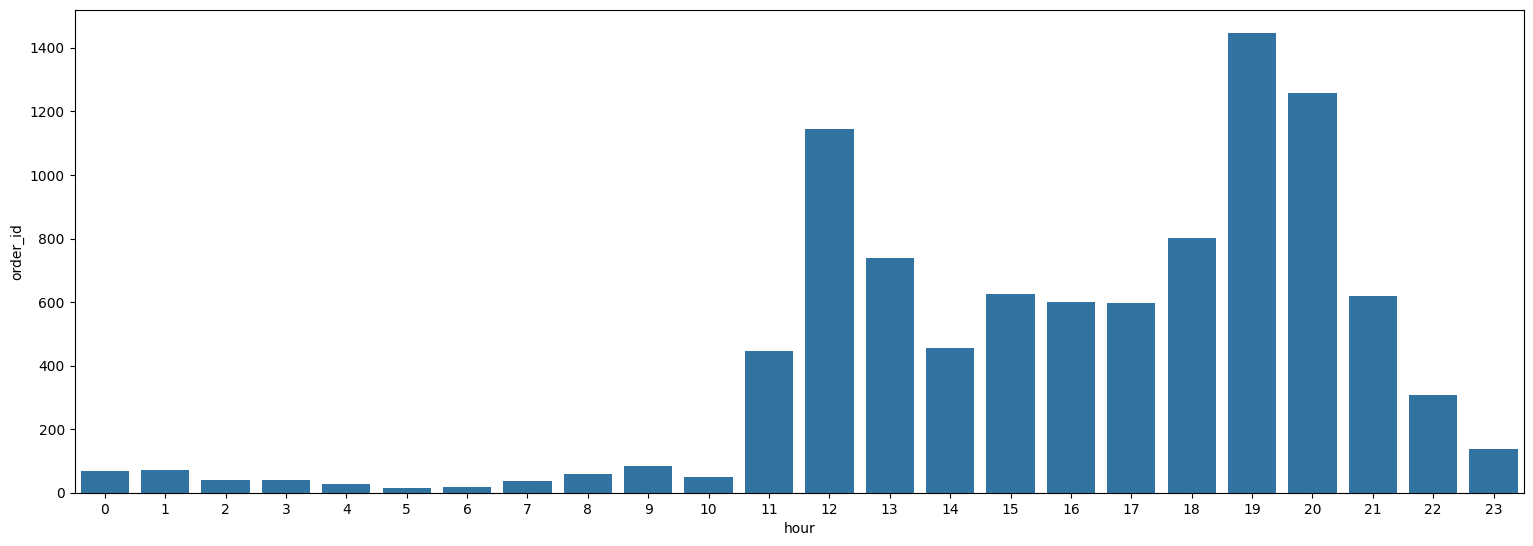

In [124]:
non_taken_hour_analysis = non_taken_df.groupby(['hour', 'daytime'])[['order_id']].count().reset_index()
sns.barplot(x = 'hour', y = 'order_id', data = non_taken_hour_analysis)

In [117]:
daytime_analysis

,daytime,order_id
0,Afternoon,5
1,Early morning,4
2,Evening,3
3,Midnight,4
4,Morning,5
5,Night,3


In [116]:
dataset.groupby(['daytime'])[['order_id']].count().transform(lambda x: x/sum(x))

,order_id
daytime,
Afternoon,0.432357
Early morning,0.002668
Evening,0.278839
Midnight,0.015882
Morning,0.096886
Night,0.173367
